In [1]:
from numpy import *
from matplotlib.pyplot import *

In [2]:
## logic functions for network with four TF nodes and iron as input to each TF.
## This network simulates constant iron environments. Fe = 1 is constant iron sufficiency. Fe = 0 is constant starvation.
def fIRON (fe):
    return fe

def fSIRR(fe, idr1, idr2):
    return fe and (( sirr and idr1) or not (idr2))

def fIDR2(fe, tror):
    return not fe and tror

def fTROR(fe, sirr):
    return not fe and not sirr
    
def fIDR1(fe, tror):
    return fe and not tror



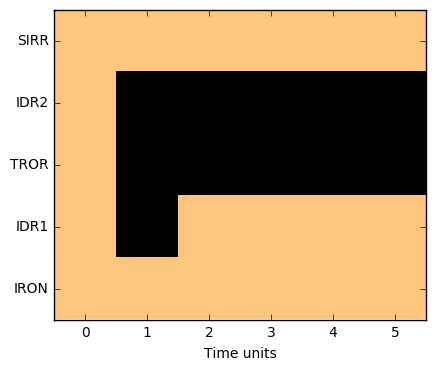

In [3]:
##  Simulate the network. Change bracketed 1's and 0's to change the start states.

SIRR = [1]
IDR2 = [1]
TROR = [1]
IDR1 = [1]
IRON = [1]


nodes = SIRR, IDR2, TROR, IDR1, IRON

nsteps = 5
for i in range(nsteps):
    idr1, idr2, tror, sirr, fe = [i[-1] for i in nodes]
    
    IRON.append(  fIRON (fe) )
    SIRR.append(  fSIRR(fe, idr1, idr2) )
    IDR2.append(  fIDR2(fe, tror) )
    TROR.append( fTROR(fe, sirr) )
    IDR1.append( fIDR1(fe, tror) )
    
    
model = array(nodes)
imshow(model, interpolation='none', cmap='copper')
xlabel('Time units')
yticks(range(len(model)), ['SIRR', 'IDR2', 'TROR', 'IDR1', 'IRON'])
None

##The output of this network model presented in Martinez-Pastor et al., Figure 5A and B


In [4]:
## logic functions for network with four TF nodes and iron as input to each TF.
## Changing from AND to OR logic input of sirr and idr1 on sirr node activity.
def fIRON (fe):
    return fe

def fSIRR(fe, idr1, idr2):
    return fe and (( sirr or idr1) or not (idr2))

def fIDR2(fe, tror):
    return not fe and tror

def fTROR(fe, sirr):
    return not fe and not sirr
    
def fIDR1(fe, tror):
    return fe and not tror



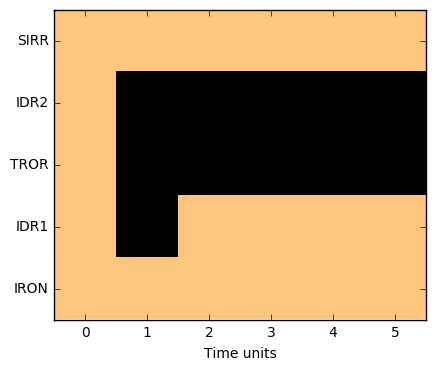

In [5]:
##  Simulate the network with alternative logic input to sirr as above. Change bracketed 1's and 0's to change the start states.

SIRR = [1]
IDR2 = [1]
TROR = [1]
IDR1 = [1]
IRON = [1]


nodes = SIRR, IDR2, TROR, IDR1, IRON

nsteps = 5
for i in range(nsteps):
    idr1, idr2, tror, sirr, fe = [i[-1] for i in nodes]
    
    IRON.append(  fIRON (fe) )
    SIRR.append(  fSIRR(fe, idr1, idr2) )
    IDR2.append(  fIDR2(fe, tror) )
    TROR.append( fTROR(fe, sirr) )
    IDR1.append( fIDR1(fe, tror) )
    
    
model = array(nodes)
imshow(model, interpolation='none', cmap='copper')
xlabel('Time units')
yticks(range(len(model)), ['SIRR', 'IDR2', 'TROR', 'IDR1', 'IRON'])
None

##No difference observed in attractors.

In [6]:
##trying network logic with autorepressive influence to sirR
## logic functions for network with four TF nodes and iron as input to each TF
def fIRON (fe):
    return fe

def fSIRR(fe, idr1, idr2):
    return not sirr and fe and idr1 or not idr2

def fIDR2(fe, tror):
    return not fe and tror

def fTROR(fe, sirr):
    return not fe and not sirr
    
def fIDR1(fe, tror):
    return fe and not tror


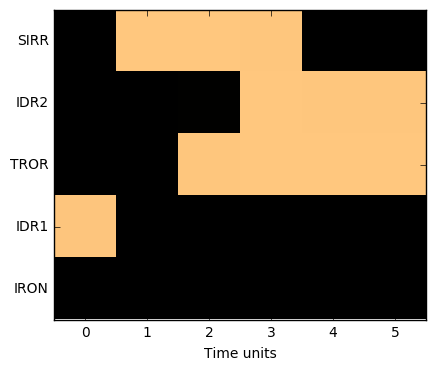

In [7]:
##  simulations with sirR autorepression...

SIRR = [0]
IDR2 = [0]
TROR = [0]
IDR1 = [1]
IRON = [0]


nodes = SIRR, IDR2, TROR, IDR1, IRON

nsteps = 5
for i in range(nsteps):
    idr1, idr2, tror, sirr, fe = [i[-1] for i in nodes]
    
    IRON.append(  fIRON (fe) )
    SIRR.append(  fSIRR(fe, idr1, idr2) )
    IDR2.append(  fIDR2(fe, tror) )
    TROR.append( fTROR(fe, sirr) )
    IDR1.append( fIDR1(fe, tror) )
    
    
model = array(nodes)
imshow(model, interpolation='none', cmap='copper')
xlabel('Time units')
yticks(range(len(model)), ['SIRR', 'IDR2', 'TROR', 'IDR1', 'IRON'])
None

##SirR is on too long during iron starvation. makes more sense for sirr to autoactivate +Fe: quicker on, quicker off +fe.

In [8]:
## adding Fe uptake into the mix for another layer of feedback.
## This network topology simulates fluctuating environmental iron.
def fIRON (fe, sirr, idr2):
    return (idr2) and not sirr

def fSIRR(fe, idr1, idr2):
    return fe and (( sirr and idr1) or not (idr2))

def fIDR2(fe, tror):
    return not fe and tror

def fTROR(fe, sirr):
    return not fe and not sirr
    
def fIDR1(fe, tror):
    return fe and not tror

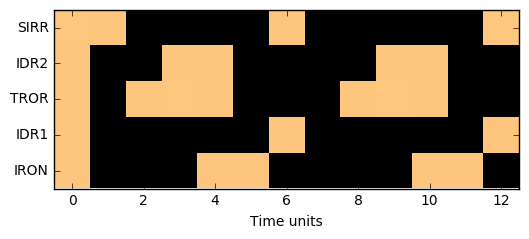

In [9]:
##  Simulating iron uptake

SIRR = [1]
IDR2 = [1]
TROR = [1]
IDR1 = [1]
IRON = [1]


nodes = SIRR, IDR2, TROR, IDR1, IRON

nsteps = 12
for i in range(nsteps):
    idr1, idr2, tror, sirr, fe = [i[-1] for i in nodes]
    
    IRON.append(  fIRON (fe, sirr, idr2) )
    SIRR.append(  fSIRR(fe, idr1, idr2) )
    IDR2.append(  fIDR2(fe, tror) )
    TROR.append( fTROR(fe, sirr) )
    IDR1.append( fIDR1(fe, tror) )
    
    
model = array(nodes)
imshow(model, interpolation='none', cmap='copper')
xlabel('Time units')
yticks(range(len(model)), ['SIRR', 'IDR2', 'TROR', 'IDR1', 'IRON'])
None

##oscillates! This is the final network model presented in Martinez-Pastor et al., Figure 5C and D.